In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore')

# plt.rcParams.update({'font.size': 10})
# plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
%matplotlib inline
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', None)

In [74]:
# #colorbrewer2 Dark2 qualitative color table
# import brewer2mpl
# from matplotlib import rcParamss
# dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
# dark2_colors = dark2_cmap.mpl_colors
# rcParams['figure.figsize'] = (10, 6)
# rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
# rcParams['lines.linewidth'] = 2
# rcParams['axes.facecolor'] = 'white'
# rcParams['font.size'] = 14
# rcParams['patch.edgecolor'] = 'white'
# rcParams['patch.facecolor'] = dark2_colors[0]
# rcParams['font.family'] = 'StixGeneral'

In [75]:
df = pd.read_csv('/Users/stevalang/Galvanize/0002_capstones/capstone1/data/bank/bank-full.csv', delimiter=';')
# df = pd.read_csv('/Users/stevalang/Galvanize/0002_capstones/capstone1/data/bank/bank-full.csv', delimiter=';',
#                 na_values = 'unknown')

In [76]:
# look at the first five rows of the bank-full.csv file. 
# I can see a handful of unknown data already!
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [57]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [58]:
df.shape

(45211, 17)

In [59]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [62]:

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [63]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,age,int64,0,0.0,77,"[33, 52, 30, 26]"
1,job,object,0,0.0,12,"[management, retired, self-employed, technicia..."
2,marital,object,0,0.0,3,"[married, single]"
3,education,object,0,0.0,4,"[secondary, primary, tertiary]"
4,default,object,0,0.0,2,"[no, yes]"
5,balance,int64,0,0.0,7168,"[2780, 36, 469, 2552, 183]"
6,housing,object,0,0.0,2,[yes]
7,loan,object,0,0.0,2,"[no, yes]"
8,contact,object,0,0.0,3,[cellular]
9,day,int64,0,0.0,31,"[29, 27, 31, 15, 11]"


In [64]:
# Check Unique values of all the column
# for x in df[['age', 'job','marital','education','default','balance','housing','loan','contact','day',
#              'month','duration','campaign', 'campaign','pdays', 'previous','poutcome', 'y']].columns:
#     print(f'{x}: \n{df[x].unique()}\n')

for i in df.columns:
    print(i)
    print(df[i].unique())
    print('----'*20)

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------------------------------------
marital
['married' 'single' 'divorced']
--------------------------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------------------------------------
default
['no' 'yes']
--------------------------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
-----------------------------------

In [65]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,age,int64,0,0.0,77,"[58, 36, 35, 37, 34]"
1,job,object,0,0.0,12,"[technician, admin., services, unknown, manage..."
2,marital,object,0,0.0,3,"[married, single]"
3,education,object,0,0.0,4,"[secondary, tertiary, primary]"
4,default,object,0,0.0,2,[no]
5,balance,int64,0,0.0,7168,"[4123, 1906, 499, 451, 533]"
6,housing,object,0,0.0,2,"[no, yes]"
7,loan,object,0,0.0,2,"[no, yes]"
8,contact,object,0,0.0,3,"[telephone, cellular, unknown]"
9,day,int64,0,0.0,31,"[27, 15, 5, 18, 20]"


In [66]:
# List of non numeric columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [67]:
# Categorical Variables:
category_cols = list(df.select_dtypes(include=['object']))
category_cols


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [68]:
# get the number of missing data points per column
# missing_values_count = df.isnull().sum()
# missing_values_count = df.isna().sum()
# missing_values_count

In [70]:
# how many total missing values do we have?
# total_cells = np.product(df.shape)
# total_missing = missing_values_count.sum()
# total_missing
# df.isnull().values.any()
# percent of data that is missing
# percent_missing = (total_missing/total_cells) * 100
# percent_missing
# df.dropna()


# # get the number of missing data points per column
# missing_values_count = df.isnull().sum()
# print(missing_values_count)
# how many total missing values do we have?
# total_cells = np.product(df.shape)
# total_missing = missing_values_count.sum()

# percent of data that is missing
# percent_missing = (total_missing/total_cells) * 100
# round(percent_missing, 2)

In [20]:
# just how much data did we lose?
# print("Columns in original dataset: %d \n" % nfl_data.shape[1])
# print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

In [21]:
# result = df.contact == 'cellular'
# df = df.drop('contact',axis=1)
# result.mean()
# df[ df.contact == 'cellular' ] = 'yes'
# df[ df.contact == 'telephone' ] = 'yes'

# result = df.contact == 'telephone'
# result.mean()

# result = df.contact == 'unknown'
# result.mean()

# df.contact.unique() # array(['unknown', 'cellular', 'telephone'], dtype=object)
# contact_col = df['contact'].copy()
# contact_col[df.contact == 'unknown'] = 'no'
# contact_col[ df.contact == 'telephone' ] = 'yes'
# contact_col[ df.contact == 'cellular' ] = 'yes'

# df.contact = contact_col
# df.job.unique()

In [71]:
(df.y == 'yes').std()

0.3214057326156639

In [72]:
# df.job.count('management')
# df[ df.job == 'admin.' ] = 'admin'
# managment = (df.job == 'management').mean()
# technician = (df.job == 'technician').mean()
# entrepreneur = (df.job == 'entrepreneur').mean()
# blue_collar = (df.job == 'blue-collar').mean()
# retired = (df.job == 'retired').mean()
# admin = (df.job == 'admin').mean()
# services = (df.job == 'services').mean()
# unemployed = (df.job == 'unemployed').mean()
# self_employed = (df.job == 'self-employed').mean()
# housemaid = (df.job == 'housemaid').mean()
# student = (df.job == 'student').mean()
# unknown = (df.job == 'unknown').mean()

# management = df.job.value_counts()['management']
# technician = df.job.value_counts()['technician']
# entrepreneur = df.job.value_counts()['entrepreneur']
# blue_collar = df.job.value_counts()['blue-collar']
# retired = df.job.value_counts()['retired']
# admin = df.job.value_counts()['admin']
# services = df.job.value_counts()['services']
# unemployed = df.job.value_counts()['unemployed']
# self_employed = df.job.value_counts()['self-employed']
# housemaid = df.job.value_counts()['housemaid']
# student = df.job.value_counts()['student']
# unknown = df.job.value_counts()['unknown']

# djobs = {'management':management, 'technician':technician, 'entrepreneur':entrepreneur, 'blue_collar':blue_collar,
# 'retired':retired, 'admin':admin, 'services':services, 'unemployed':unemployed, 'self_employed':self_employed,
# 'housemaid':housemaid, 'student':student, 'unknown':unknown}

# djobs.items()

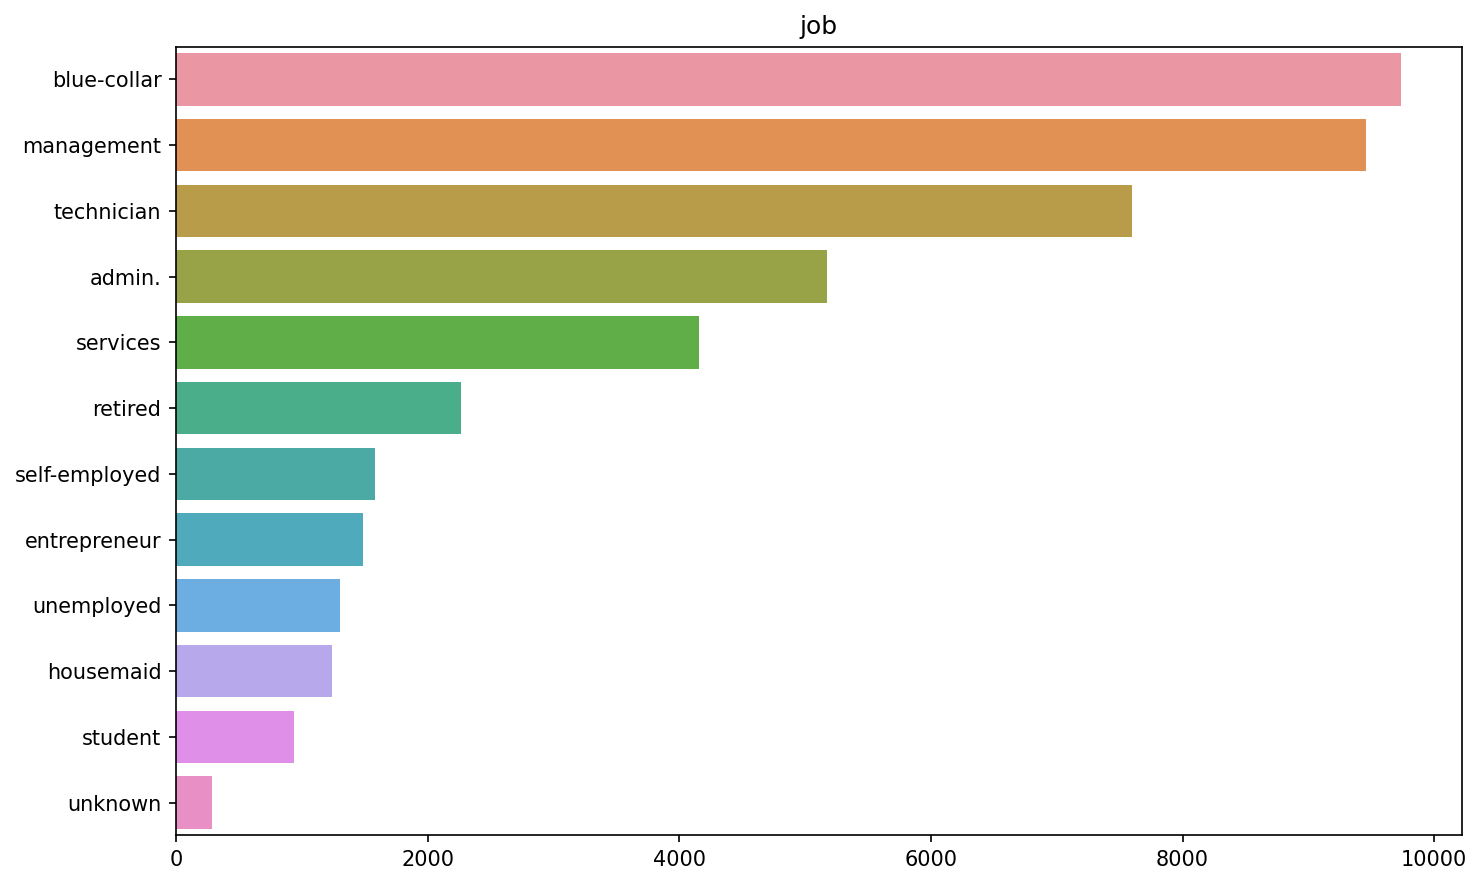

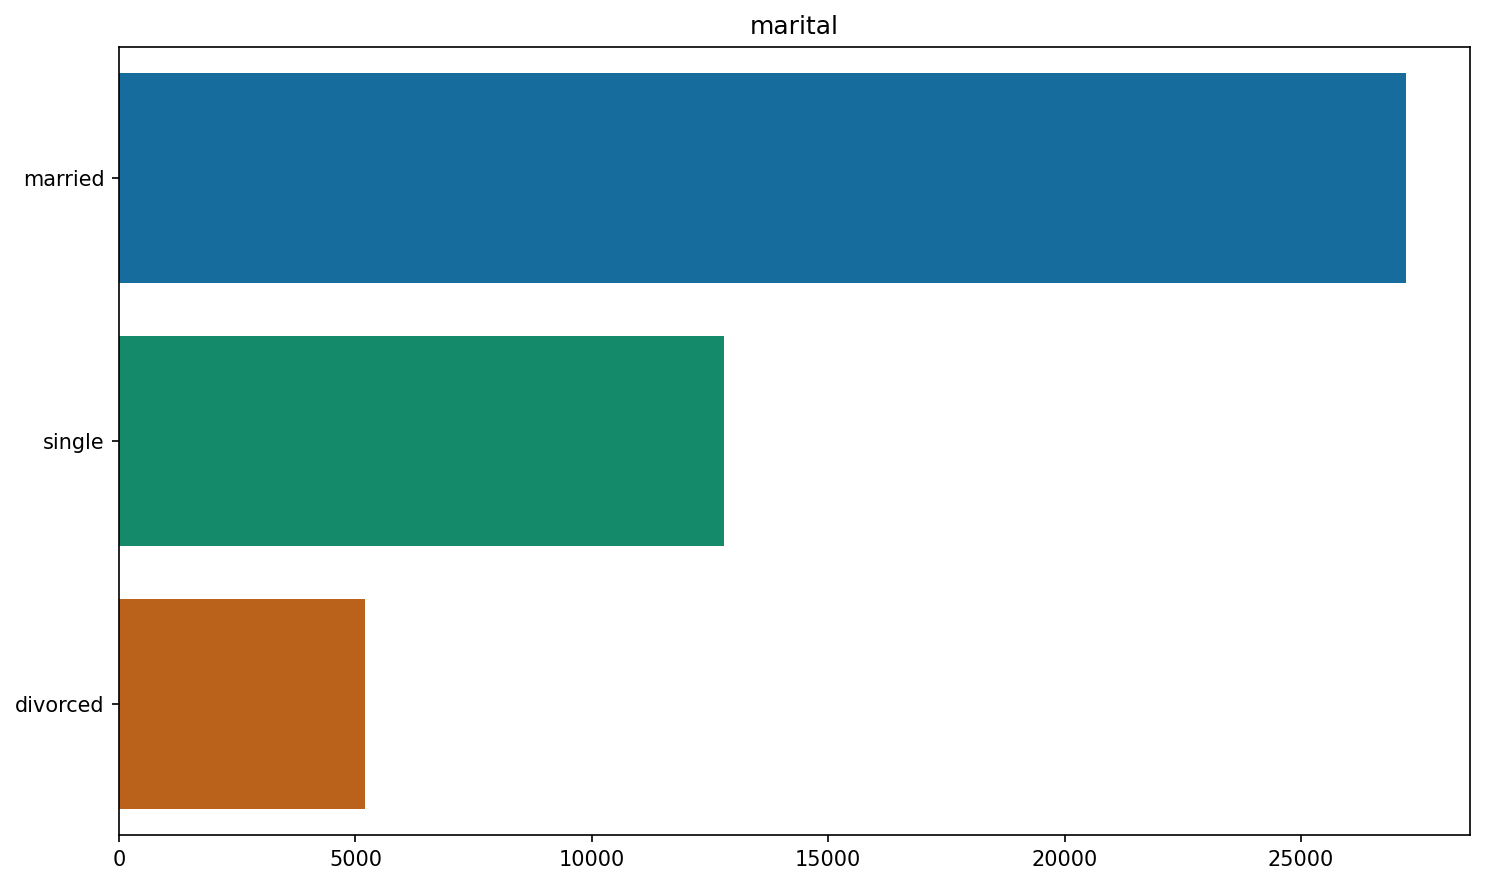

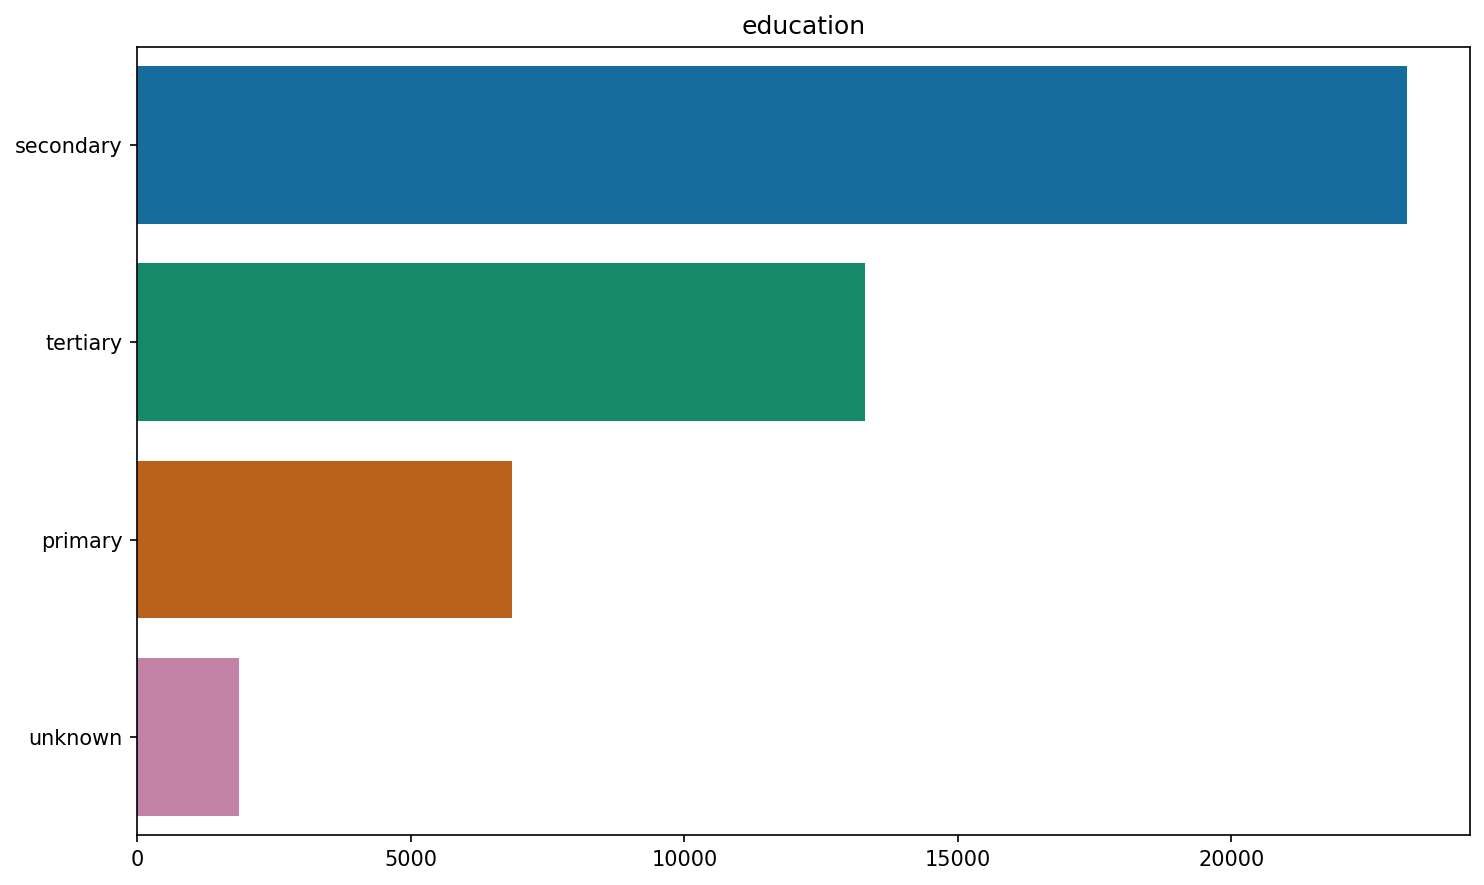

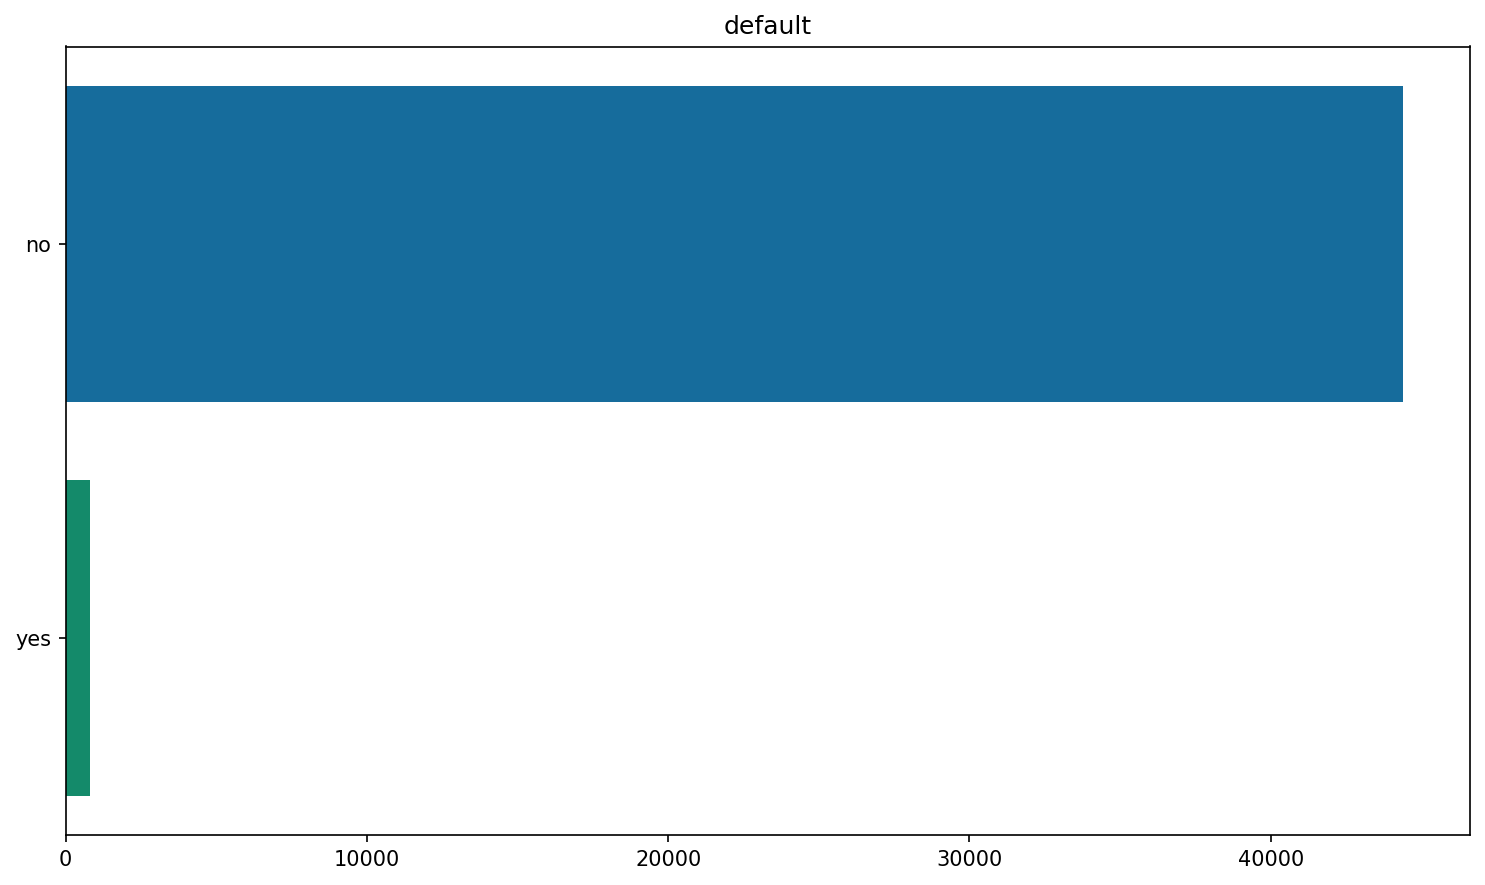

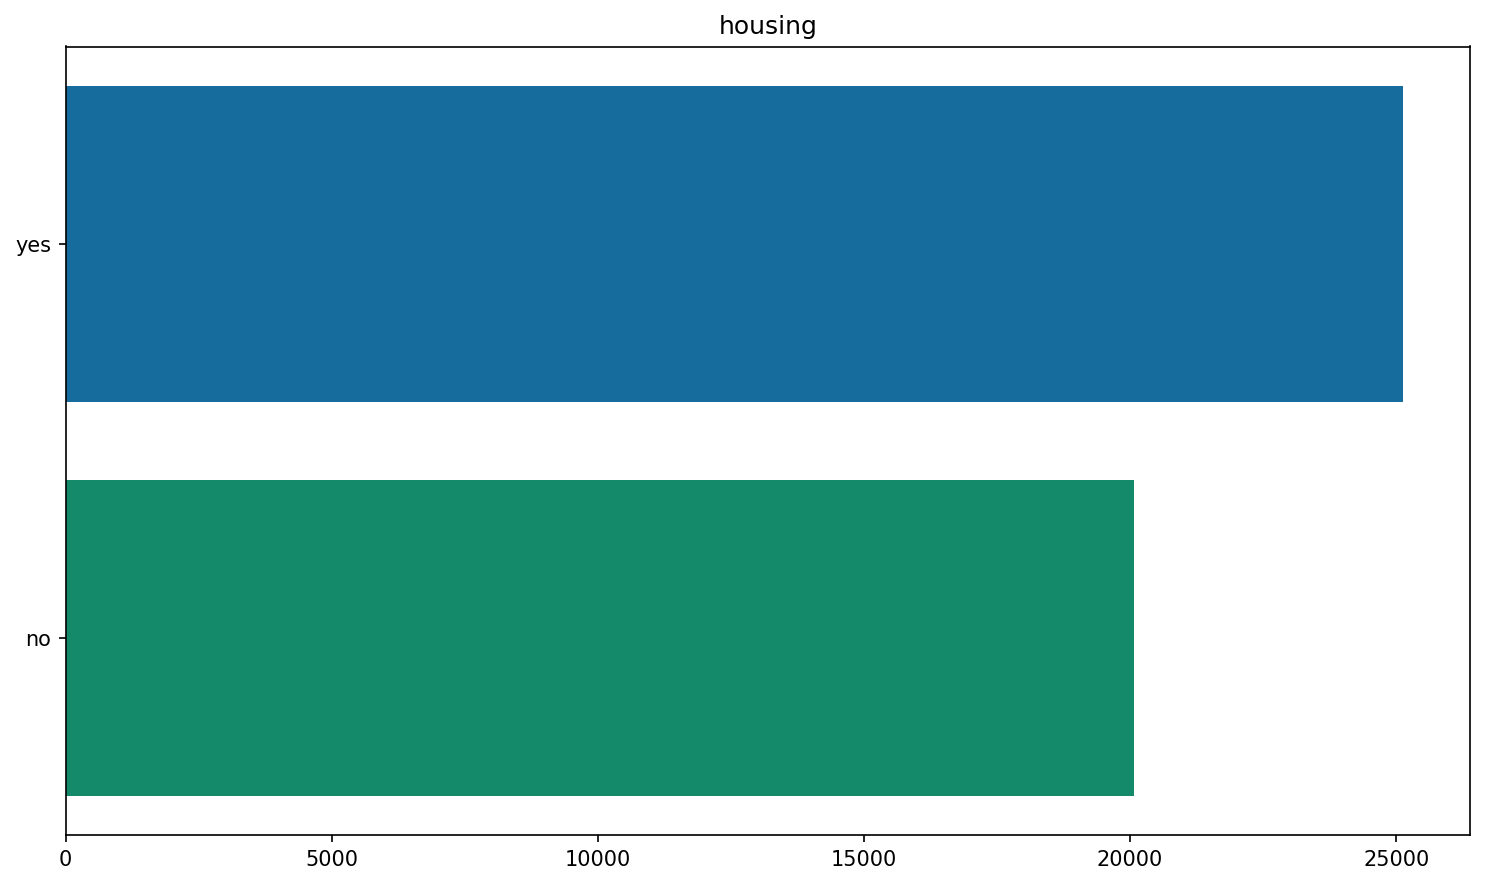

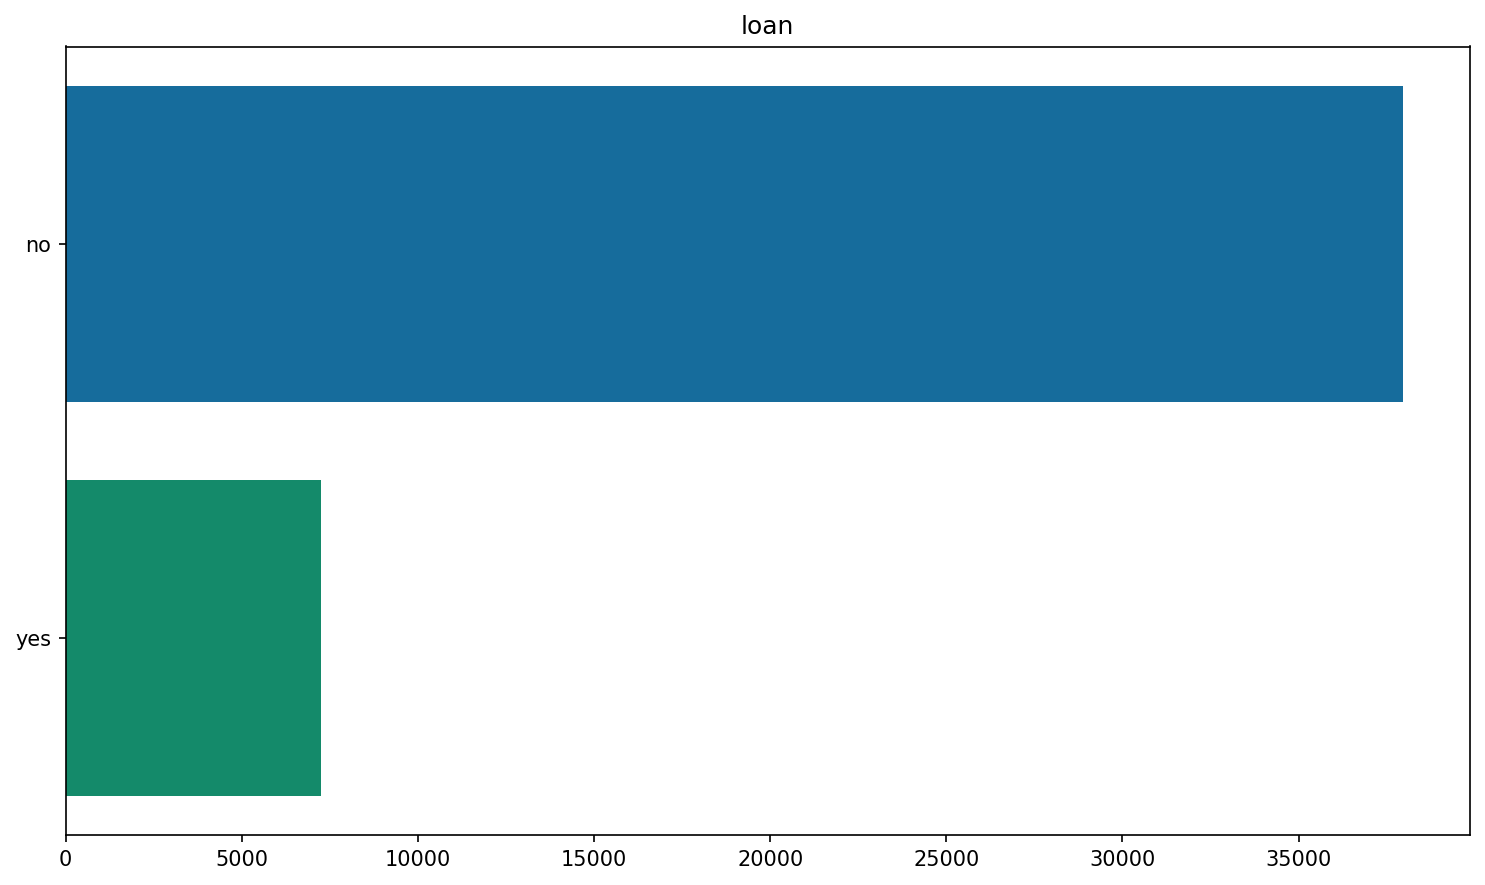

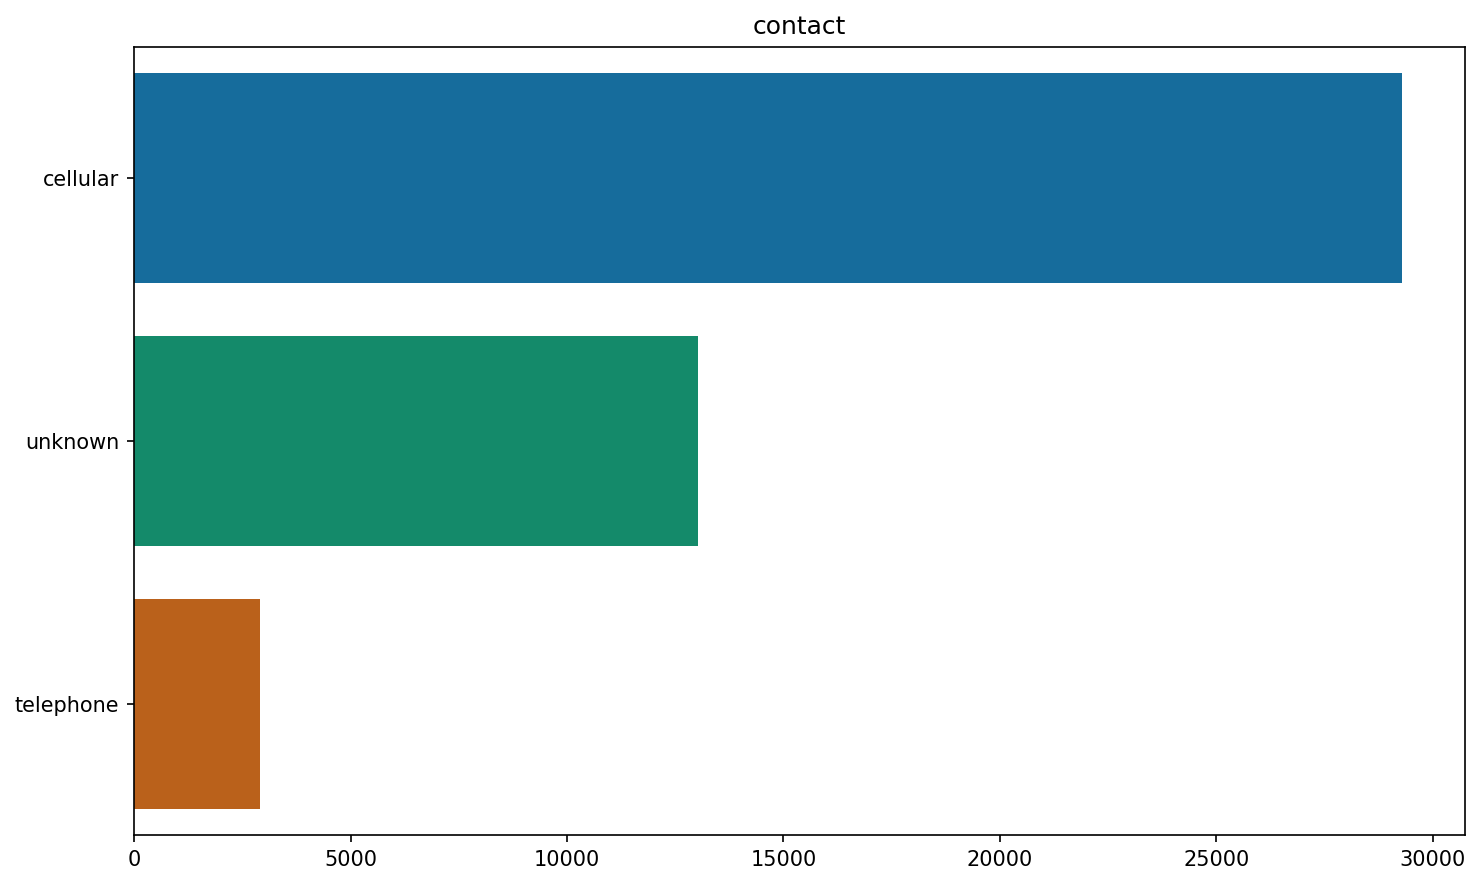

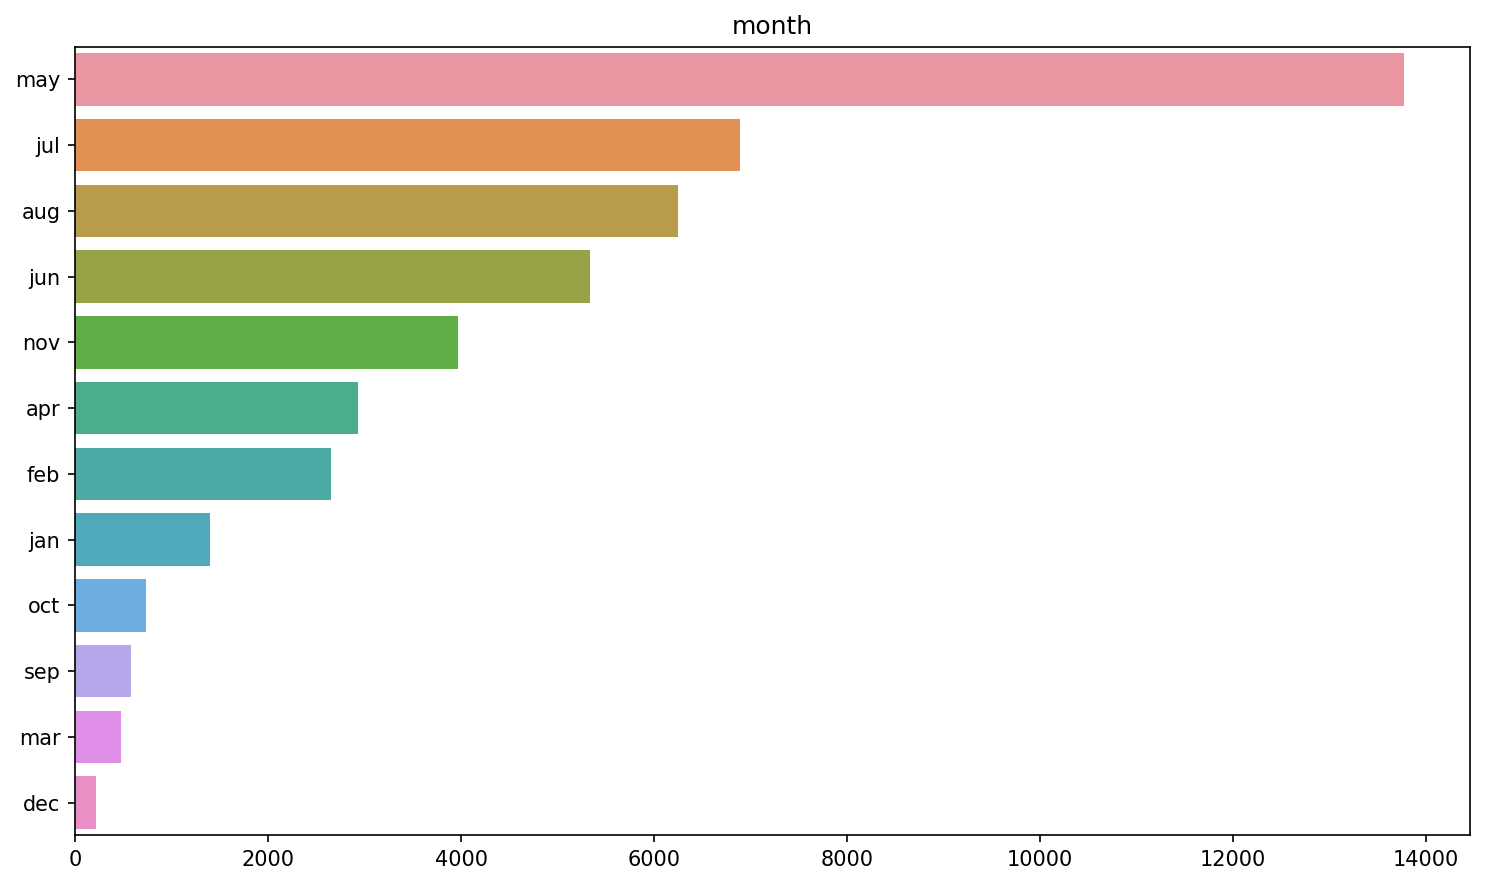

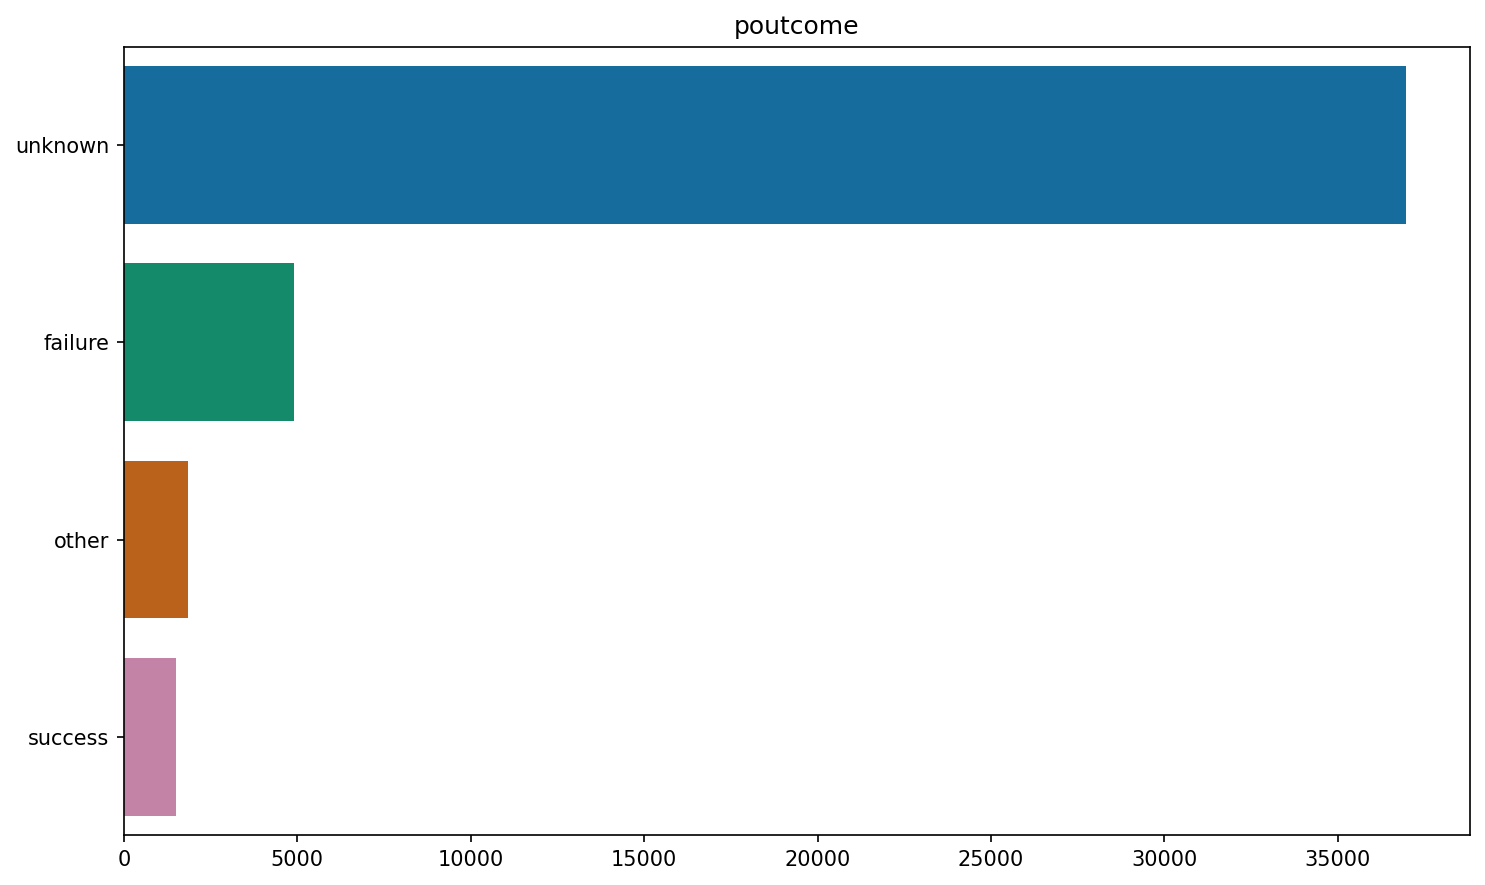

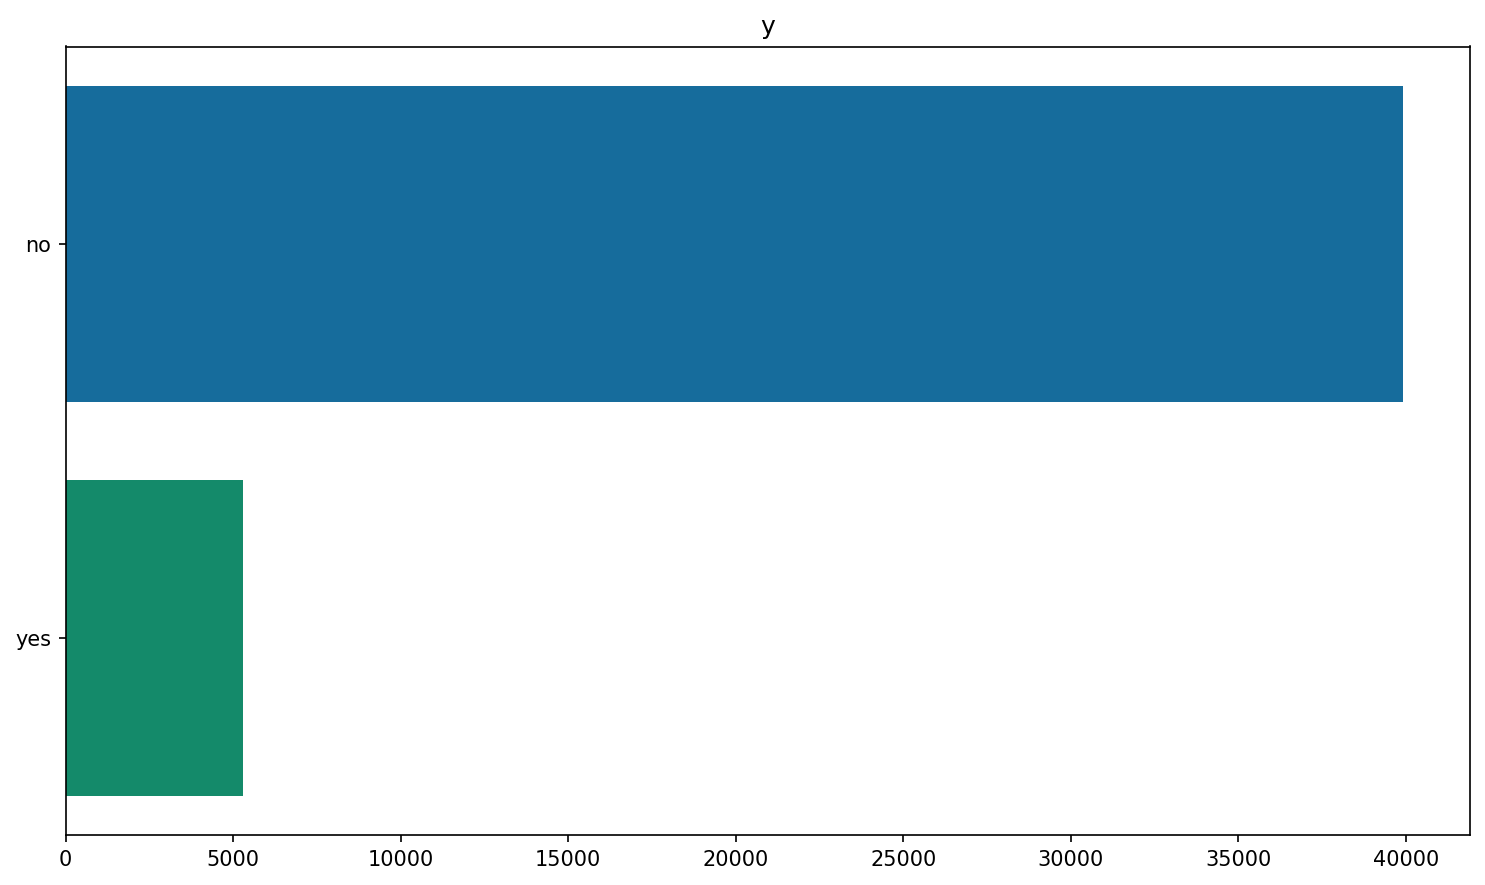

In [77]:
# See what are the categories and are there any missing values for these categories.
for col in category_cols:
    plt.figure(figsize=(10,6), dpi=150)
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

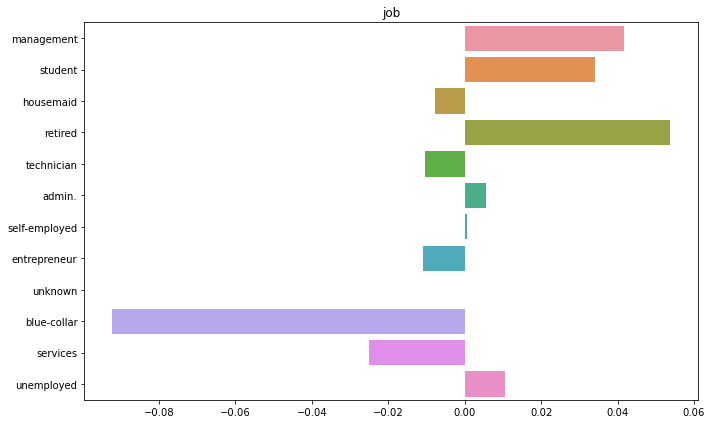

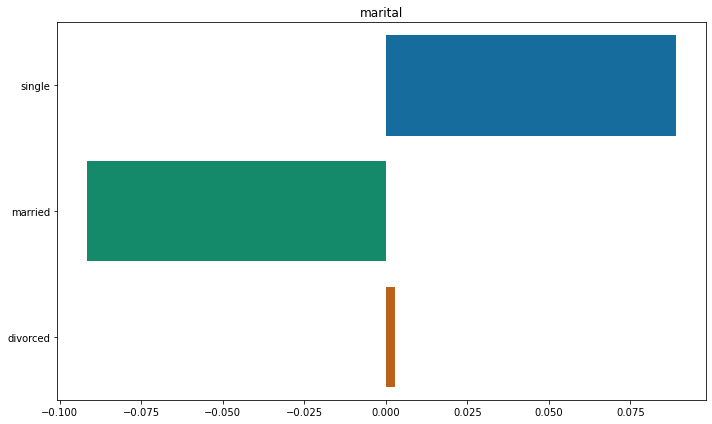

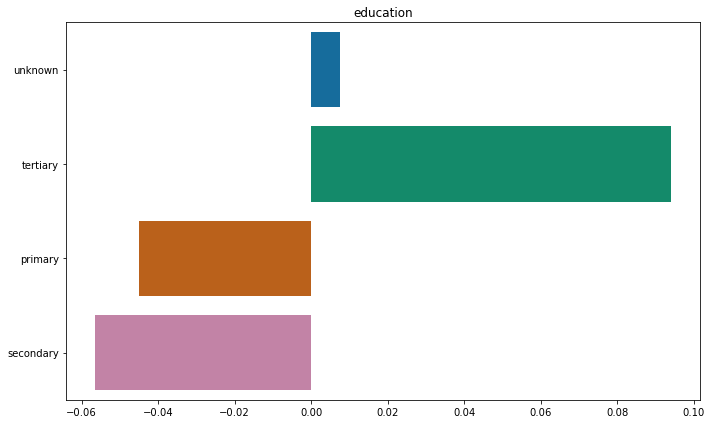

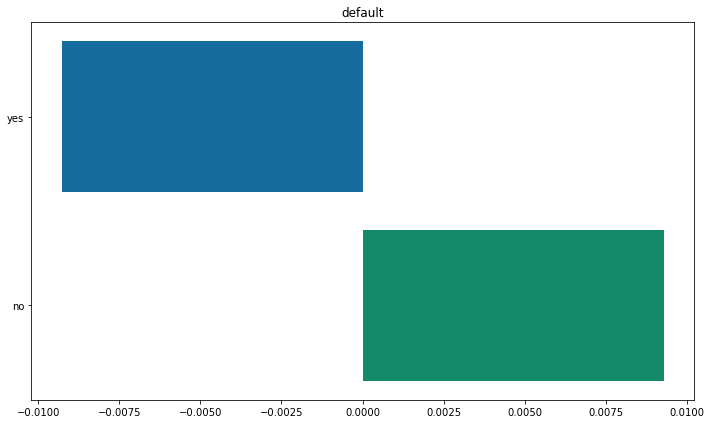

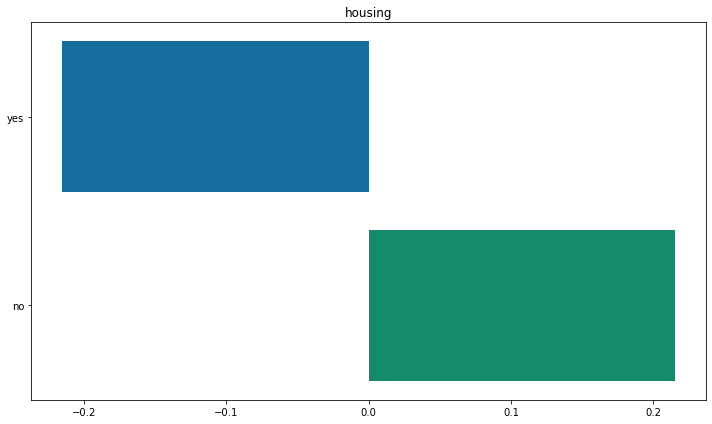

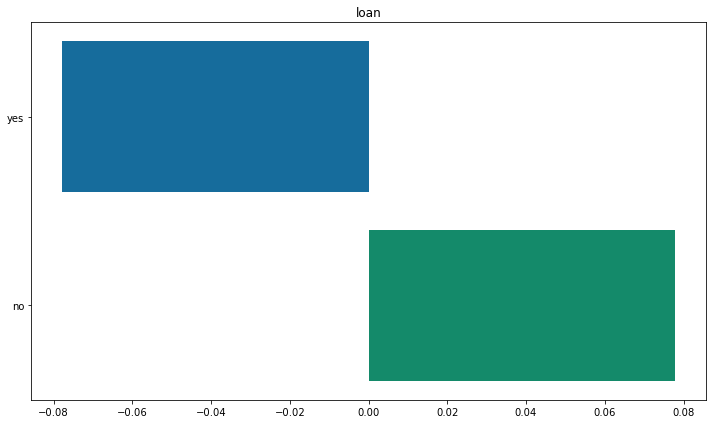

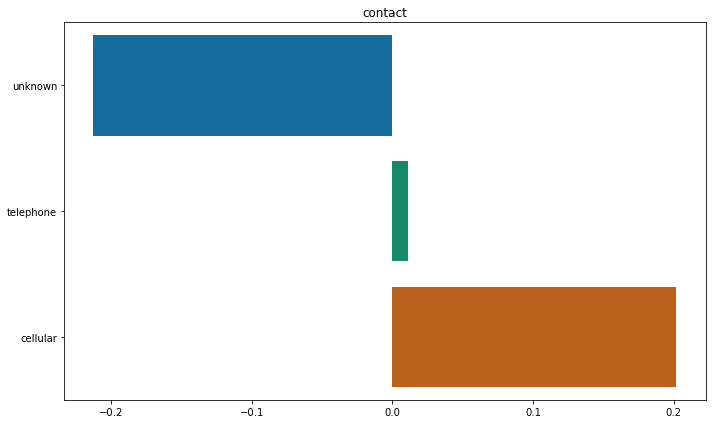

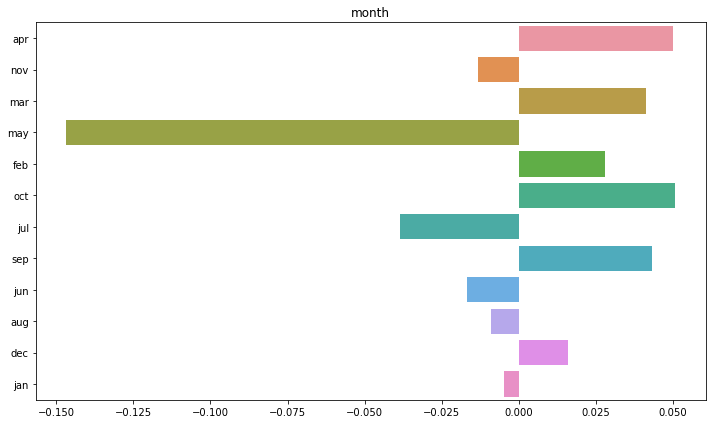

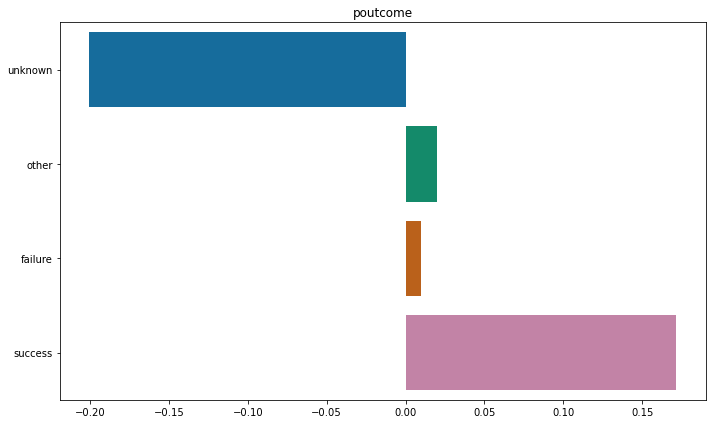

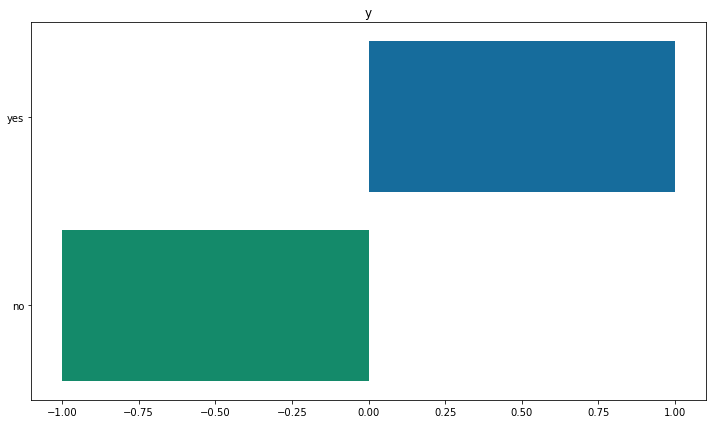

In [78]:
#List of the normalized relative frequency of the target class per category.
#Normalized distribution of each class per feature and plotted the difference between positive and negative frequencies. 
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.

for col in category_cols:
    plt.figure(figsize=(10, 6))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts()
    neg_counts = df.loc[df.y.values == 'no' ,  col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    # Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
    
    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()


In [79]:
df.default.replace('unknown', 'no', inplace=True)

In [80]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)


In [81]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [82]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [83]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

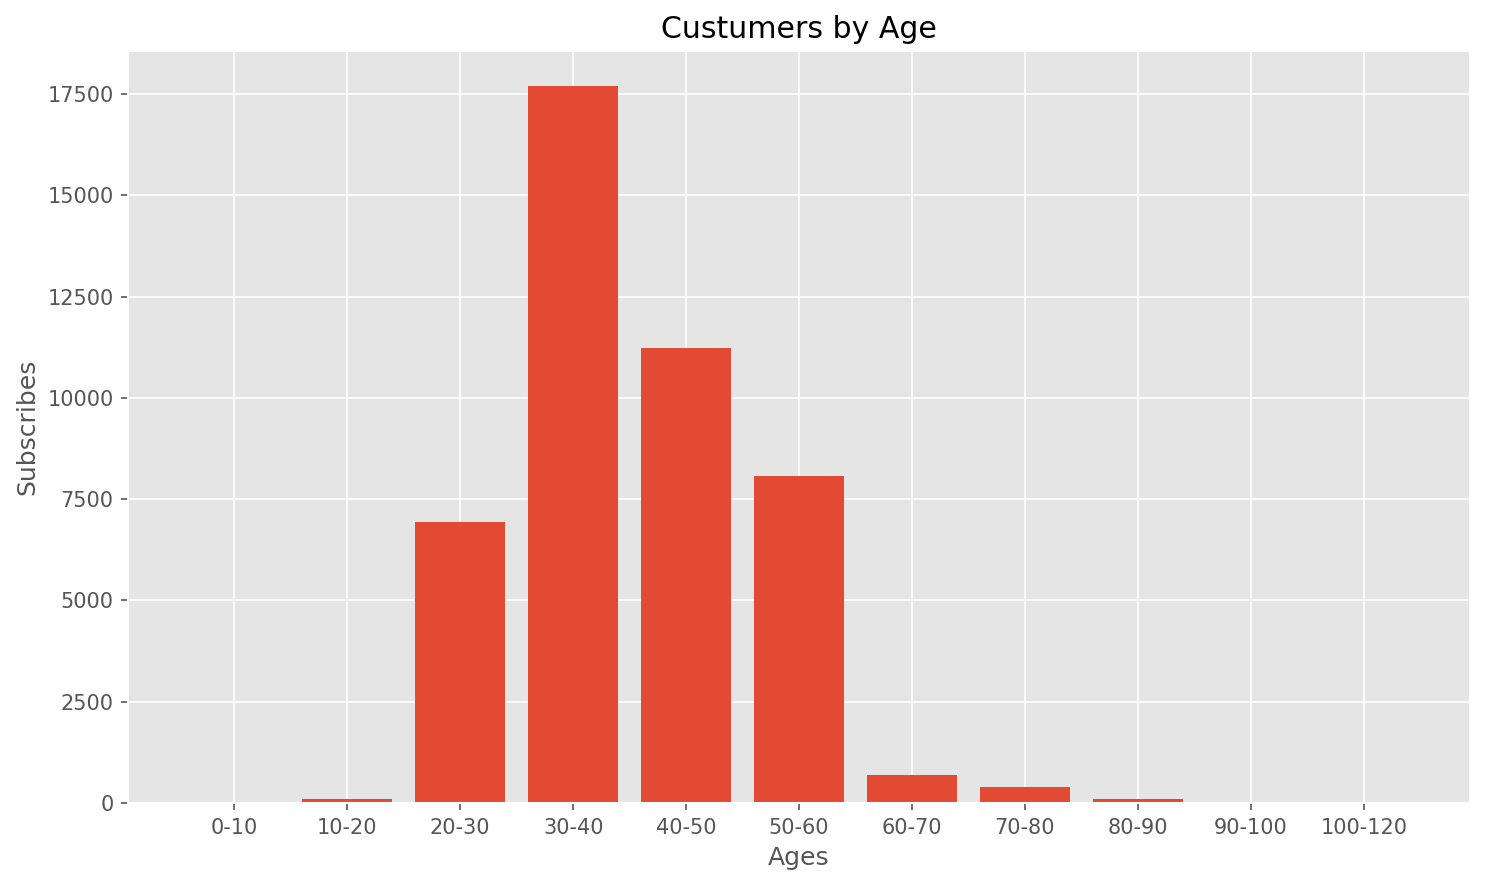

In [144]:
df['bin'] = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

In [98]:
binomial = stats.binom(n=100, p=0.8)
p_value = 1 - binomial.cdf(84)

In [122]:
print(1- binomial.cdf(84))

0.12850551483879746


In [99]:
p_value

0.12850551483879746

In [100]:
stats.test_1samp

AttributeError: module 'scipy.stats' has no attribute 'test_1samp'

In [110]:
from scipy.stats import ttest_1samp
import numpy as np   
 


ages = df.age
 
#Calculate the Mean of the ages
mu = round(np.mean(ages))
mu

41

In [134]:
custum_yes_df = df.loc[df.y == 'yes']
custum_yes_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bin
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1.0,0,unknown,yes,50-60
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1.0,0,unknown,yes,50-60
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1.0,0,unknown,yes,40-50
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1.0,0,unknown,yes,50-60
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1.0,0,unknown,yes,50-60


In [136]:
custum_no_df = df.loc[df.y == 'no']
custum_no_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bin
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1.0,0,unknown,no,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1.0,0,unknown,no,40-50
2,33,entrepreneur,married,secondary,no,2,yes,no,unknown,5,may,76,1,-1.0,0,unknown,no,30-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1.0,0,unknown,no,40-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1.0,0,unknown,no,30-40


In [307]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df_ = welch_satterhwaithe_df(custum_yes_df.age, custum_no_df.age)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df_))

Degrees of Freedom for Welch's Test: 6109.34


In [320]:
custum_no_df.age

0        58
1        44
2        33
3        47
4        33
         ..
45194    59
45198    37
45199    34
45209    57
45210    37
Name: age, Length: 39922, dtype: int64

In [321]:
students = stats.t(df_)
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)


test_statistic = welch_test_statistic(custum_yes_df.age, custum_no_df.age)
# print(test_statistic)
p_value = 1 - students.cdf(test_statistic)
print("p-value for Nick average kickflip height greater than Matt: {:2.4f}".format(p_value))

p-value for Nick average kickflip height greater than Matt: 0.0000


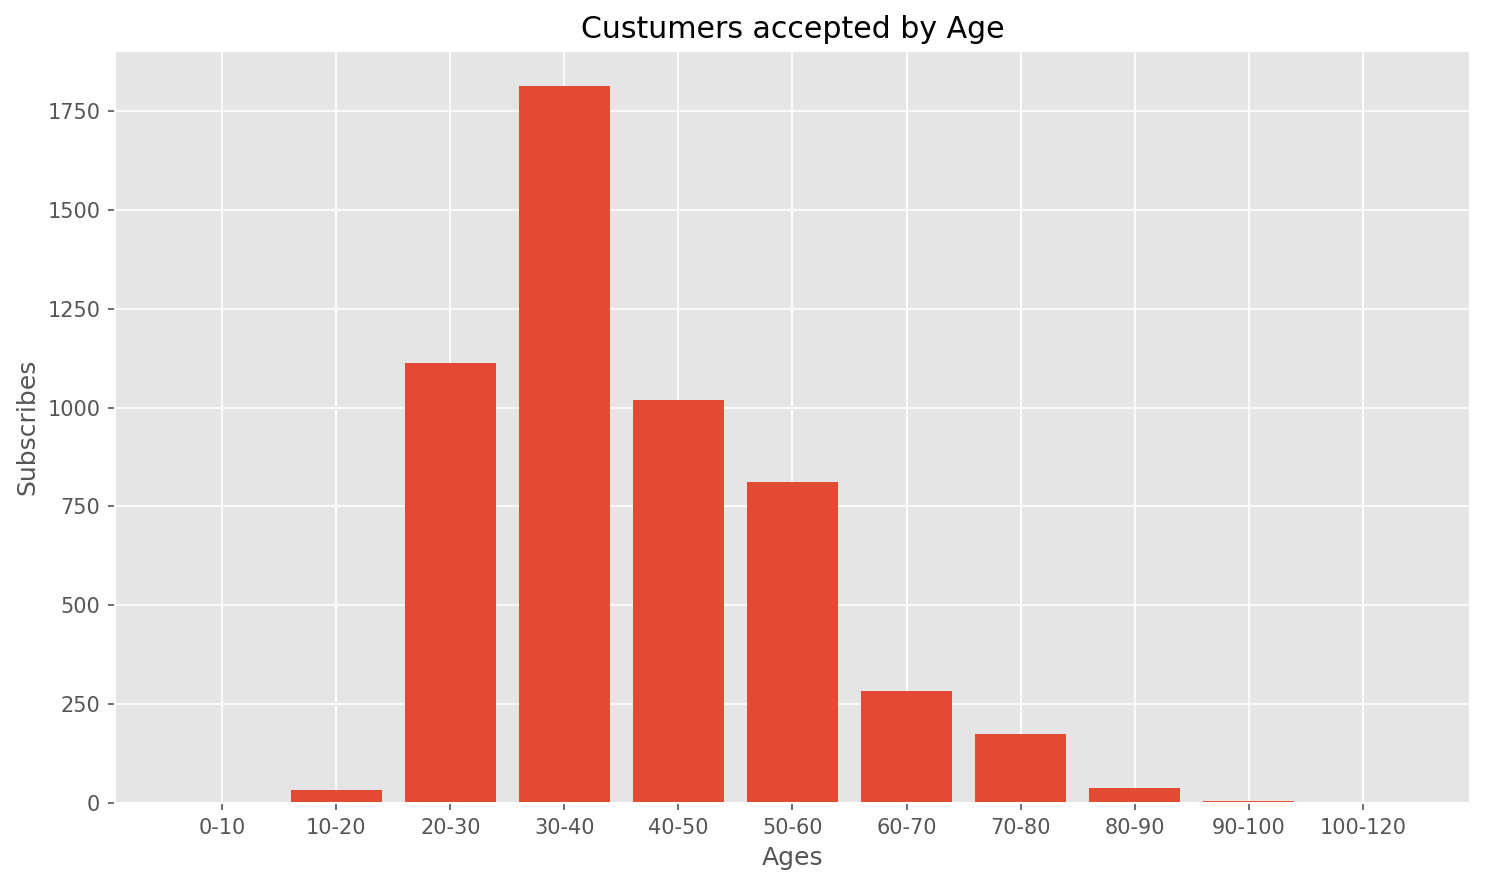

In [150]:
df['bin'] = pd.cut(custum_yes_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers accepted by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

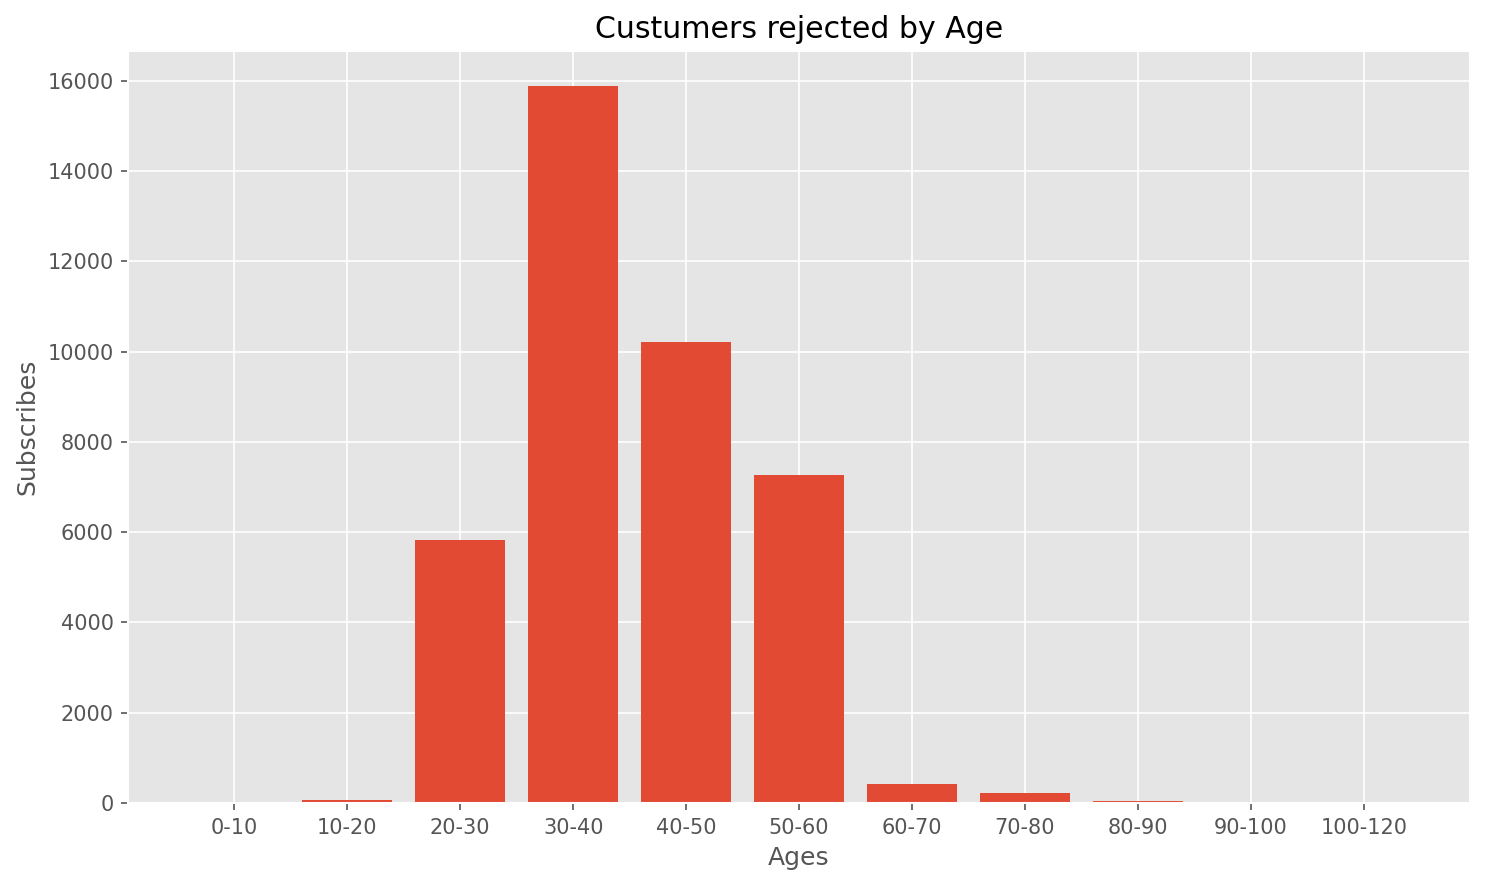

In [149]:
df['bin'] = pd.cut(custum_no_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers rejected by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

In [306]:
df['20-30'] = pd.cut(custum_yes_df.age, [40, 50], labels=['50-60'])
print(df['20-30'].value_counts())
df['30-40'] = pd.cut(custum_yes_df.age, [30, 40], labels=['30-40'])
print(df['30-40'].value_counts())

20-30    1112
Name: 20-30, dtype: int64
30-40    1812
Name: 30-40, dtype: int64


In [305]:
df['20-30'] = pd.cut(custum_yes_df.age, [40, 50], labels=['50-60'])
print(df['20-30'].value_counts())
df['30-40'] = pd.cut(custum_yes_df.age, [30, 40], labels=['30-40'])
print(df['30-40'].value_counts())

df['20-30'] = pd.cut(custum_no_df.age, [20, 30], labels=['20-30'])
print(df['20-30'].value_counts())
df['30-40'] = pd.cut(custum_no_df.age, [30, 40], labels=['30-40'])
print(df['30-40'].value_counts())

20-30    5821
Name: 20-30, dtype: int64
30-40    15875
Name: 30-40, dtype: int64


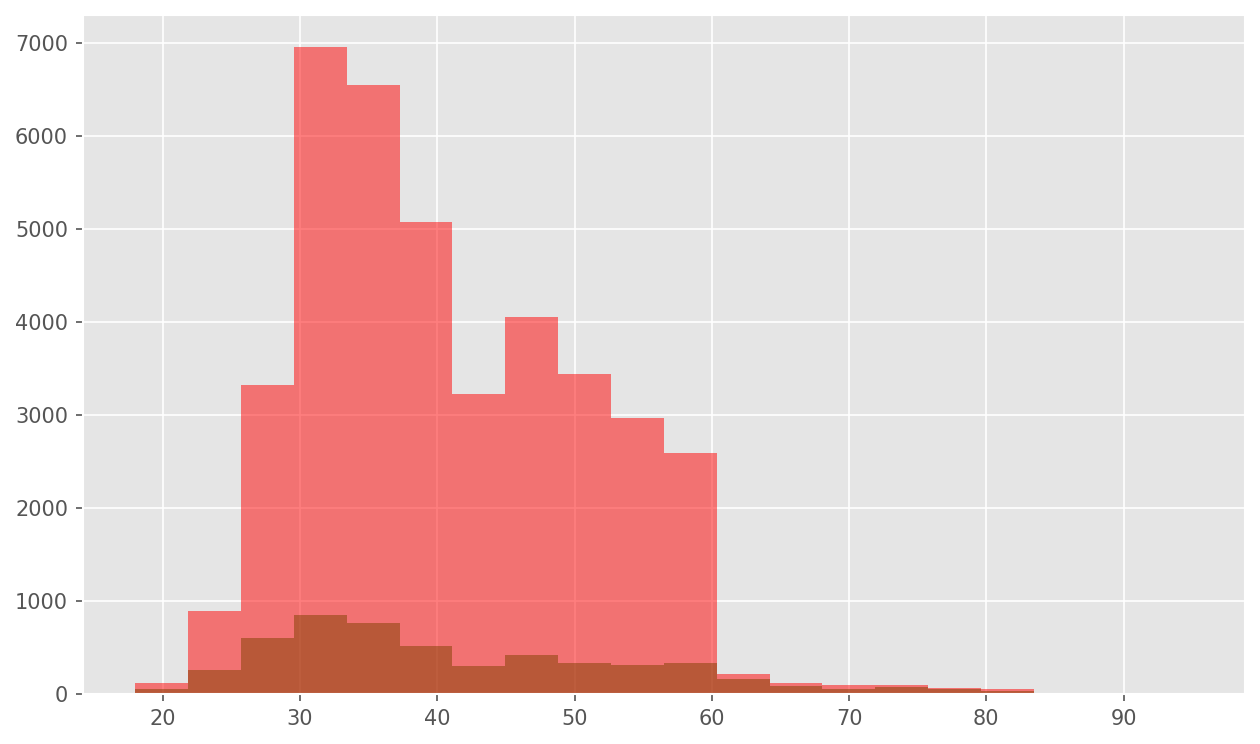

In [156]:
# plot
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
plt.hist(custum_yes_df.age, bins=20, color='g', alpha=0.5)
plt.hist(custum_no_df.age, bins=20, color='r', alpha=0.5)
plt.show()



5289
39922


In [177]:
'''
pY=P(Client accepts a term deposit)
 
pN=P(Client reject a term deposit)

H0: pY ≤ pN
'''



from scipy.stats import ttest_ind  
 
custum_yes_mean = custum_yes_df.age.mean()
custum_no_mean = custum_no_df.age.mean()
 
print("custum_yes_mean Sample Mean:", custum_yes_mean)
print("custum_no_mean Sample Mean:", custum_no_mean)
 
statistic, pval = ttest_ind(custum_yes_df.age,custum_no_df.age, equal_var = False)
pval

custum_yes_mean Sample Mean: 41.670069956513515
custum_no_mean Sample Mean: 40.83898602274435


8.825643691922395e-08

In [159]:
if pval[1] < 0.05:
 print("pval is ", pval[1], "Null Hypothesis Rejected")
 print("samples are statistically different")
else:
 print("pval is ", pval[1], "Null Hypothesis Accepted")
 print("samples are NOT statistically different")

pval is  8.825643691922395e-08 Null Hypothesis Rejected
samples are statistically different


In [238]:
# print(len(custum_yes_df))
# print(len(custum_no_df))
df['y'].value_counts()

5289
39922


no     39922
yes     5289
Name: y, dtype: int64

In [239]:
countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


In [184]:
# Frequency client accepts in a sample≈Normal(pY,pY(1−pY)/len(custum_yes_df))
# Frequency client rejects in a sample≈Normal(pN,pN(1−pN)/len(custum_no_df))

# Difference in sample frequencies between accept and reject ≈ Normal(pY−pN,pN(1−pN)/len(custum_yes_df)+pY(1−pY)/len(custum_no_df))
# H0: pY=pN≡p
# Difference in sample frequencies between accept and reject≈Normal(0,p(1−p)/len(custum_yes_df)+p(1−p)/len(custum_no_df))
 

stats.no

stats.norm(0, ((pval(1−pval)/len(custum_yes_df)) + (pval(1−pval)/len(custum_no_df)) )

SyntaxError: invalid character in identifier (<ipython-input-184-1947173f0007>, line 11)

<AxesSubplot:xlabel='y', ylabel='age'>

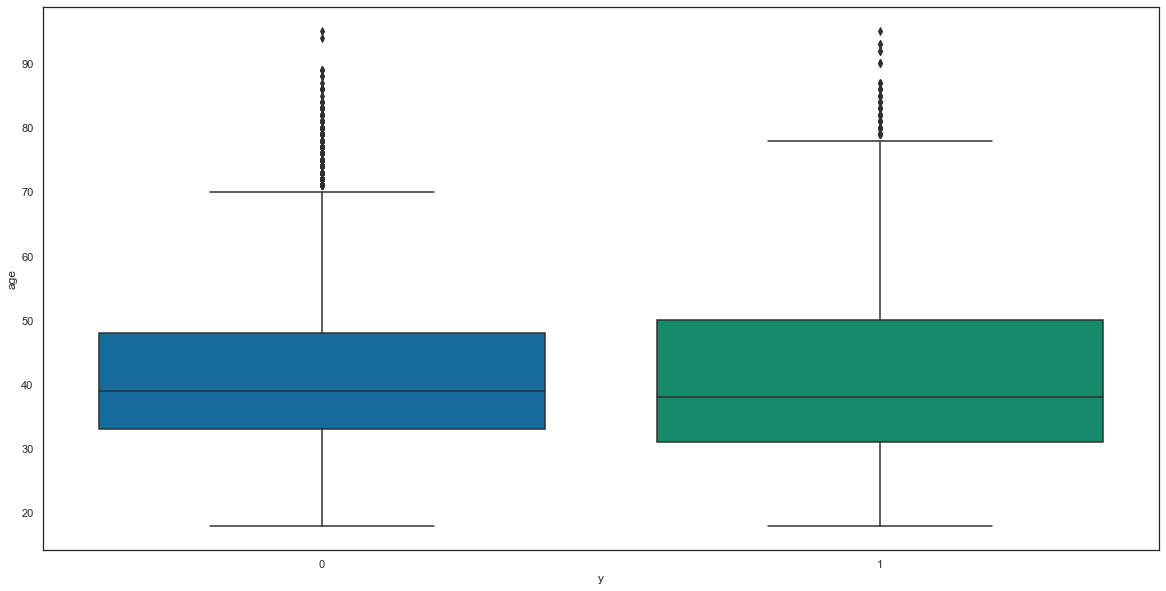

In [349]:
# Compare the different brackets
plt.figure(figsize=(20, 10))
sns.boxplot(data = df, x='y', y ='age')

<Figure size 1440x720 with 0 Axes>

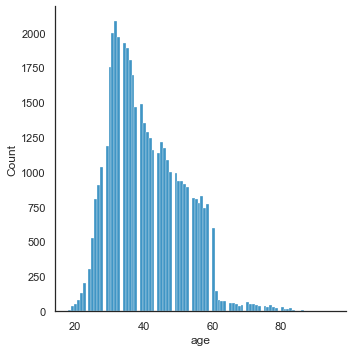

In [348]:
plt.figure(figsize=(20, 10))
sns.displot(df['age'])


<AxesSubplot:xlabel='y', ylabel='duration'>

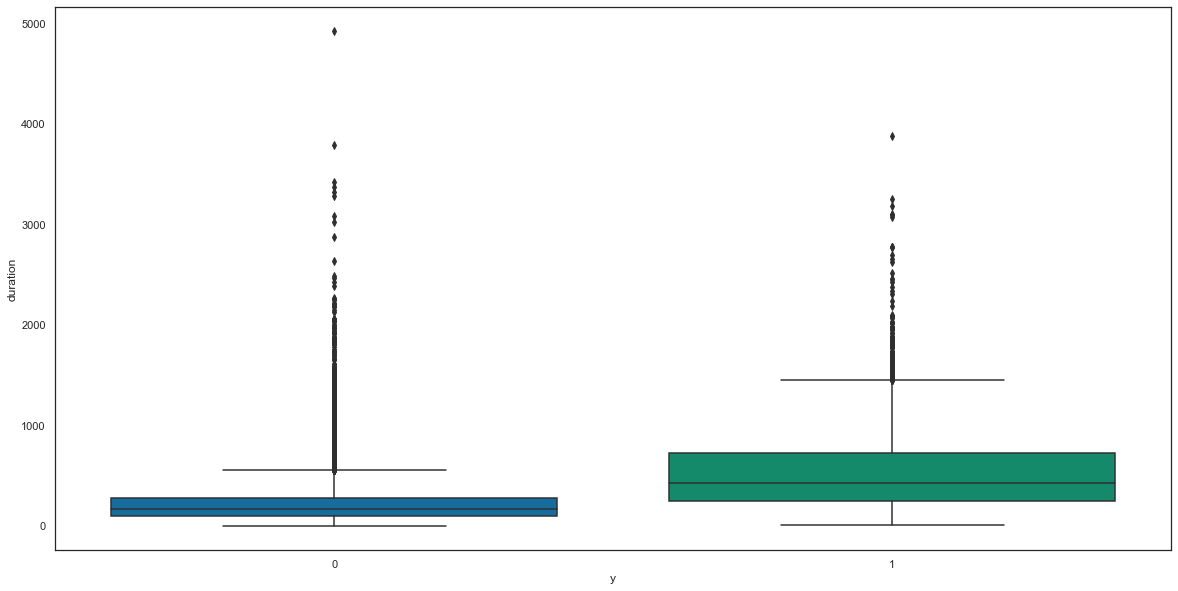

In [347]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='y', y='duration')

<AxesSubplot:xlabel='duration', ylabel='Density'>

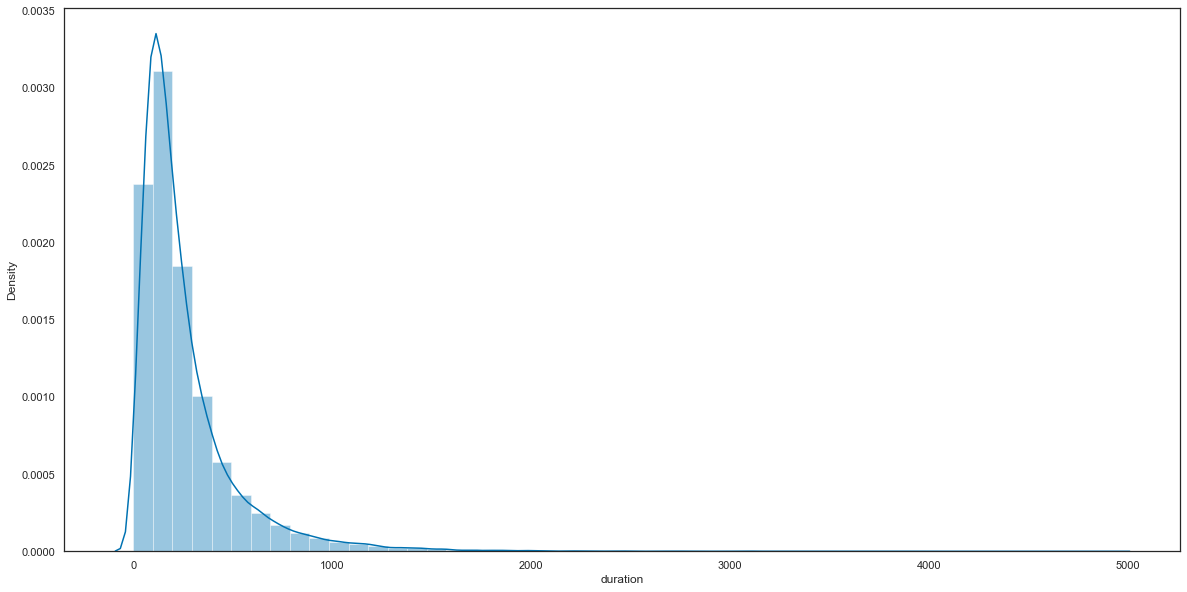

In [346]:
plt.figure(figsize=(20, 10))
sns.distplot(df['duration'])


In [232]:
corr = df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Text(0.5, 1.05, 'Pearson correlation of Features')

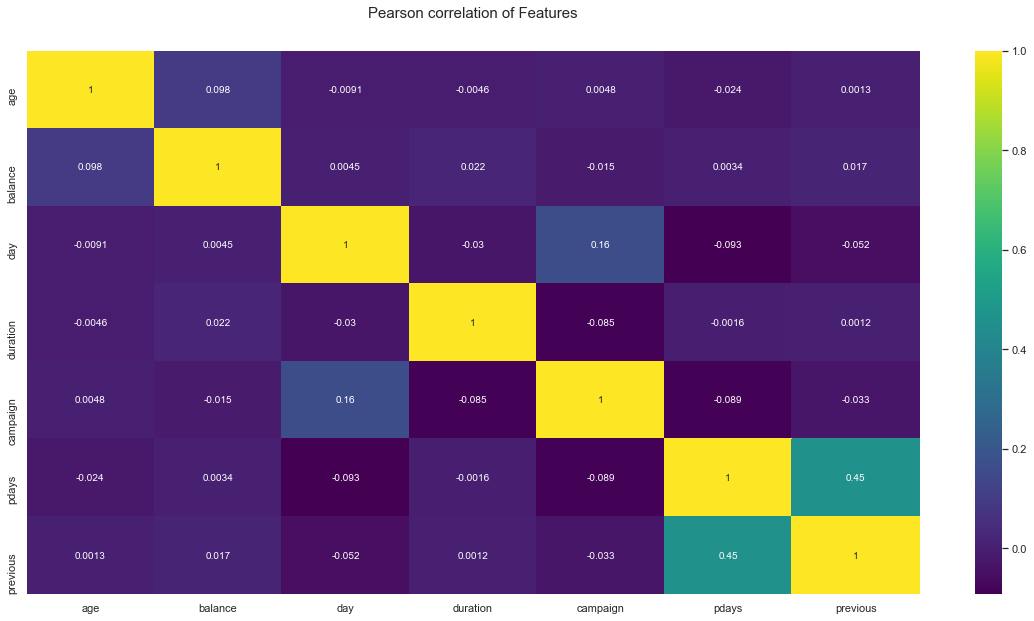

In [345]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')
plt.title("Pearson correlation of Features", y=1.05, size = 15)

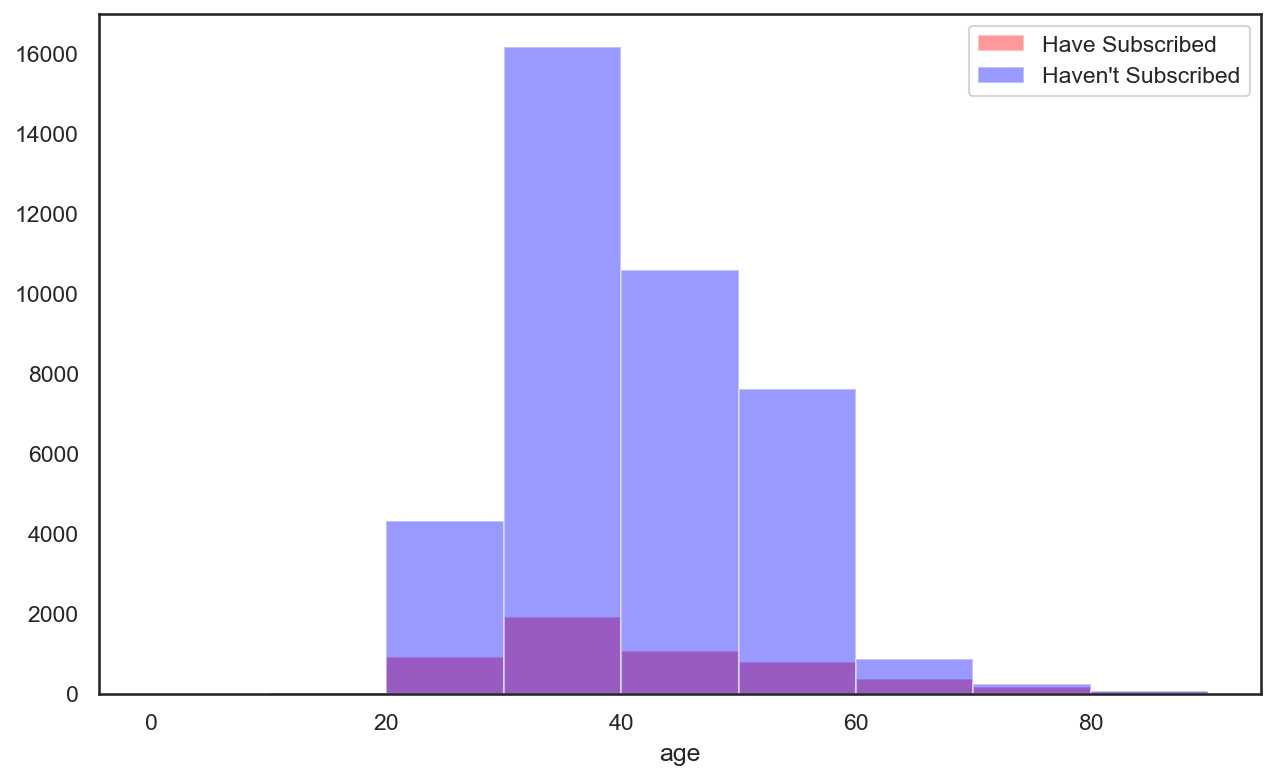

In [260]:
bins = range(0, 100, 10)
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

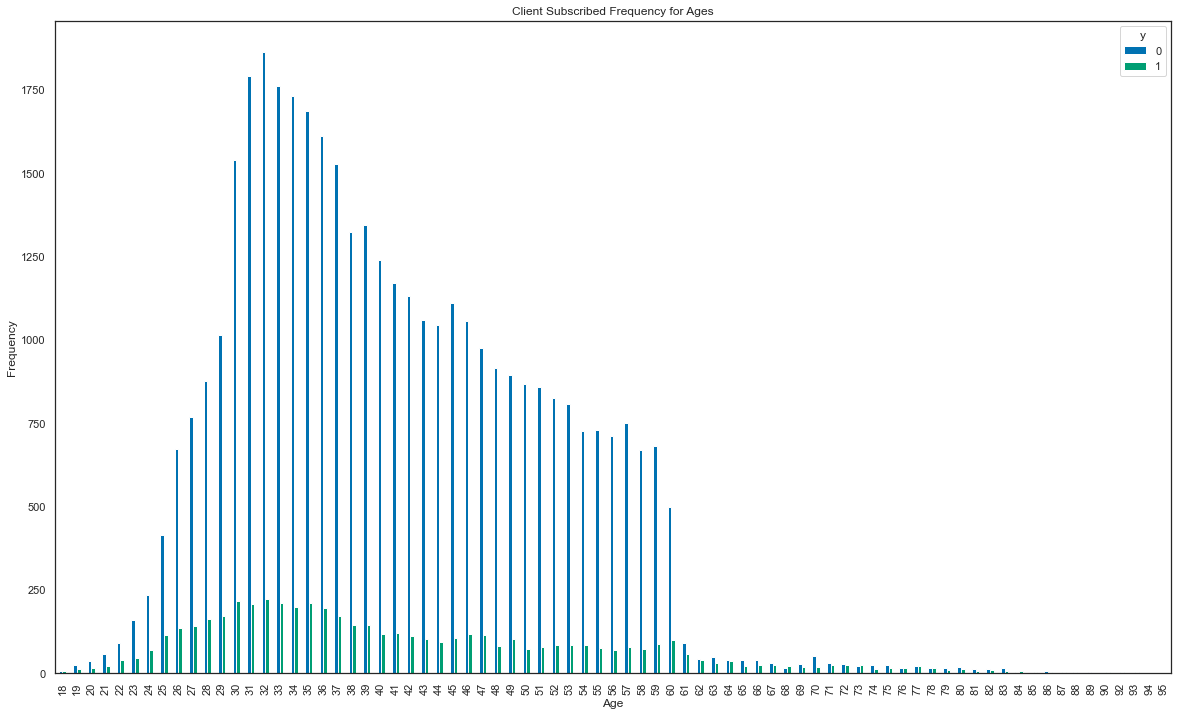

In [376]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,12))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_frequency.png', transparent=False)

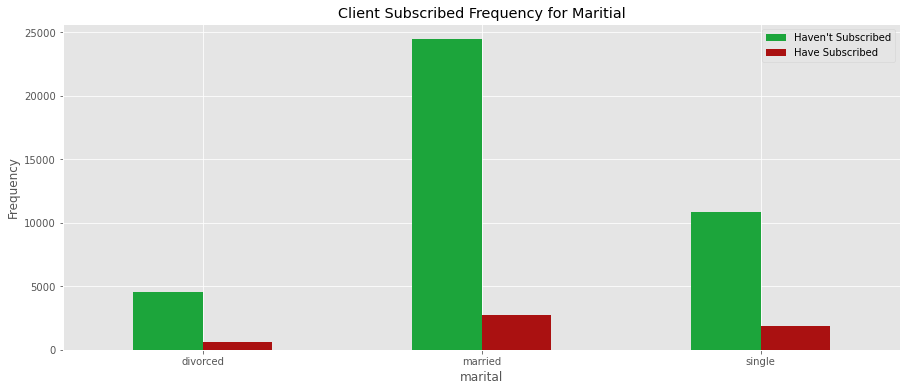

In [242]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

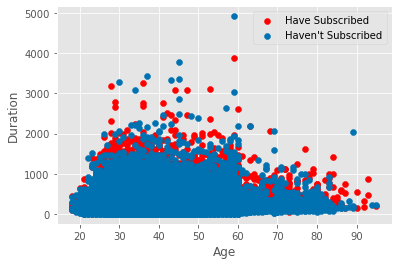

In [243]:
plt.scatter(x=df.age[df.y=='yes'], y=df.duration[(df.y=='yes')], c="red")
plt.scatter(x=df.age[df.y=='no'], y=df.duration[(df.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

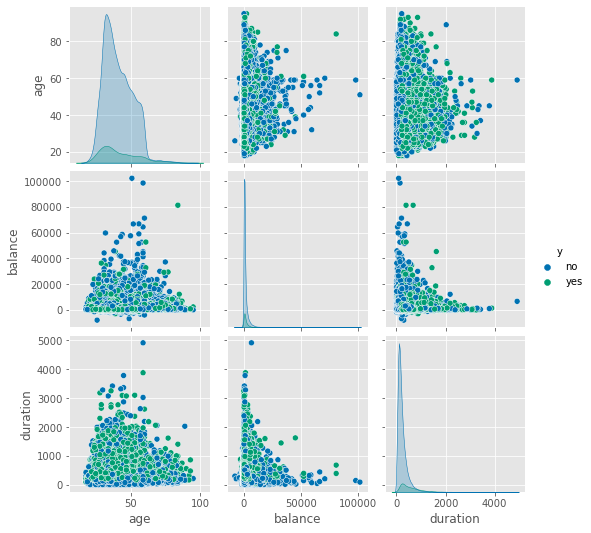

In [244]:
sns.pairplot(data=df, hue='y', vars= ['age', 'balance', 'duration'])

<AxesSubplot:xlabel='y', ylabel='count'>

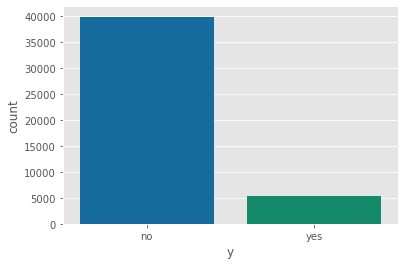

In [245]:
sns.countplot(x='y', data=df, label='Count')

<AxesSubplot:xlabel='age', ylabel='balance'>

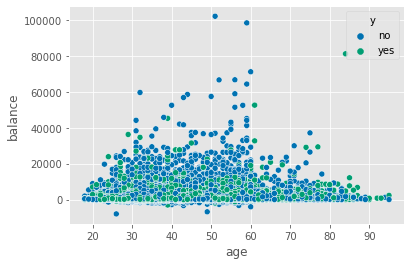

In [246]:
sns.scatterplot(x='age', y='balance',hue='y', data=df)

<AxesSubplot:xlabel='duration', ylabel='Density'>

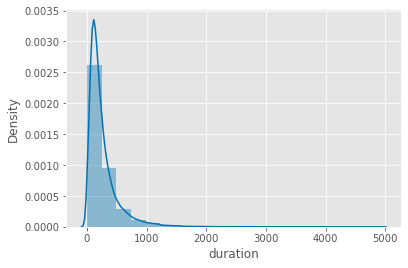

In [248]:
sns.distplot(df.duration, bins = 20) 

In [256]:
X = df.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

X = pd.get_dummies(X)
y = pd.get_dummies(y)

X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

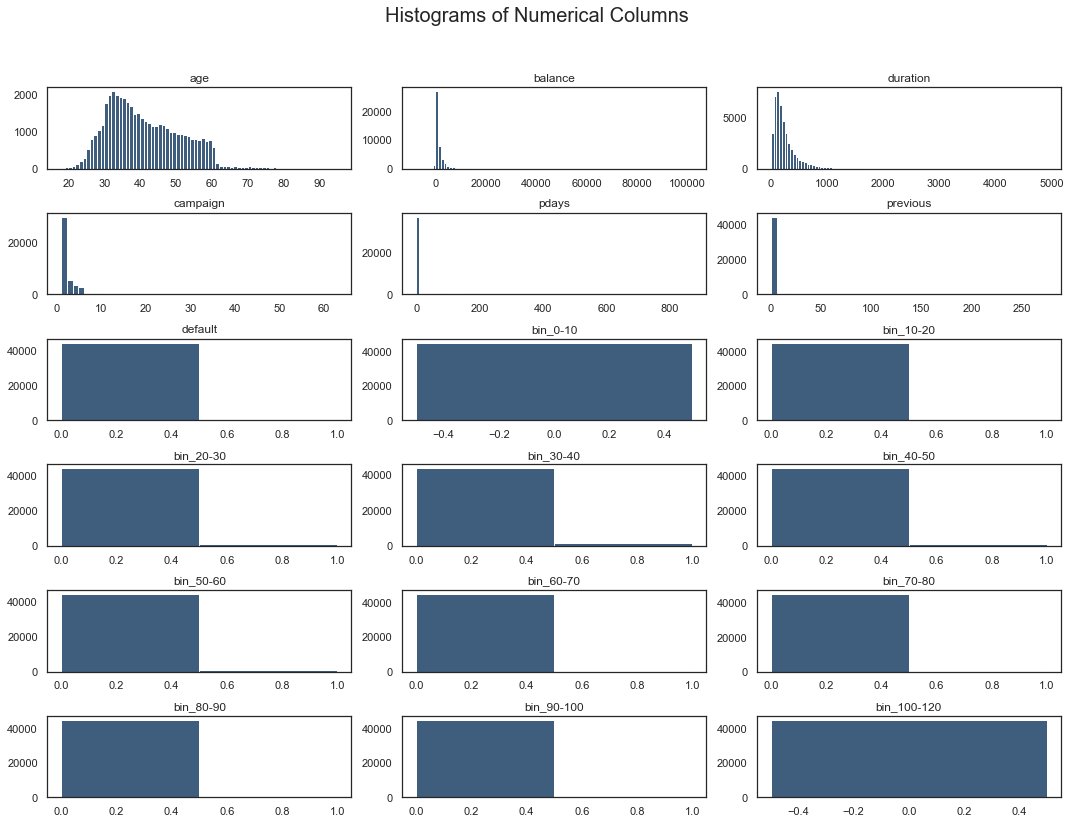

In [365]:


df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hist_num_cols.png')


<AxesSubplot:title={'center':'Correlation with Y'}>

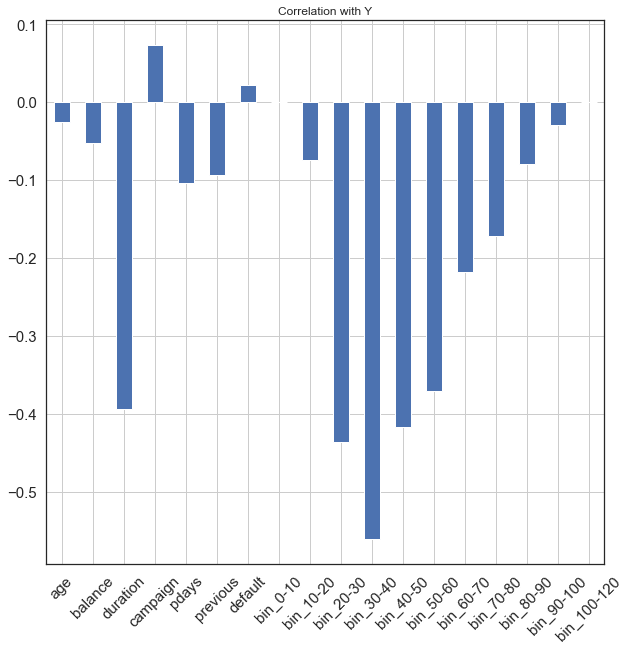

In [258]:
## Correlation with independent Variable 
df2.corrwith(y.y).plot.bar(
        figsize = (10, 10), title = "Correlation with Y", fontsize = 15,
        rot = 45, grid = True)

<AxesSubplot:>

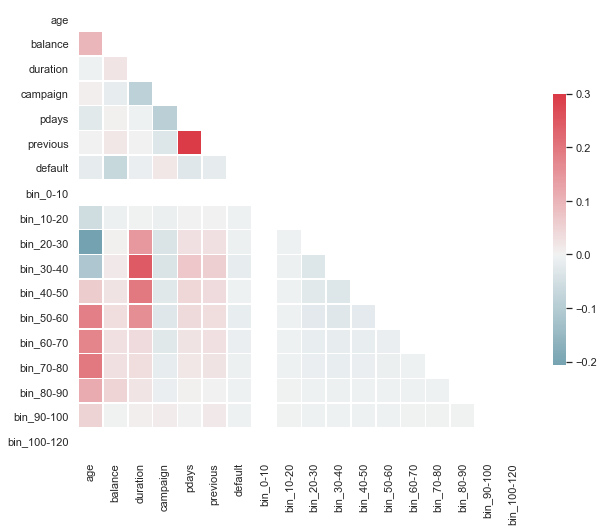

In [259]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [266]:
# What % of people over 60 years old subscribed to a term deposit, which is a lot in comparison with younger individuals (15.2% for young adults (aged lower than 30) and only 9.4% for the remaining observations said yes (aged between 30 and 60)).



In [284]:
df3 = df['y'].copy()
df3[df.y == 'no'] = 0
df3[ df.y == 'yes' ] = 1
df.y = df3


df4 = df['housing'].copy()
df3[df.housing == 'no'] = 0
df3[ df.housing == 'yes' ] = 1
df.housing = df3

In [287]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object

In [292]:
stats.chisquare(df.housing, df.y)

ZeroDivisionError: float division by zero

In [ ]:
binomial = stats.binom(n=3100, p=0.80)
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 3100, num=3000)

fig, axs = plt.subplots(2, figsize=(16, 6))
bar_sizes = [binomial.pmf(i) for i in range(3101)]
bars = axs[0].bar(range(3101), bar_sizes, color="black", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3)
axs[0].set_xlim(0, 2600)

bars = axs[1].bar(range(3101), bar_sizes, color="grey", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3)
axs[1].set_xlim(2400, 2600)

axs[0].set_title("# of Kickflips Landed Under The Null Hypothesis")

In [322]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bin,20-30,30-40
0,58,management,married,tertiary,no,2143,0,no,unknown,5,may,261,1,-1.0,0,unknown,0,NaN,NaN,NaN
1,44,technician,single,secondary,no,29,0,no,unknown,5,may,151,1,-1.0,0,unknown,0,NaN,NaN,NaN
2,33,entrepreneur,married,secondary,no,2,0,no,unknown,5,may,76,1,-1.0,0,unknown,0,NaN,NaN,NaN
3,47,blue-collar,married,unknown,no,1506,0,no,unknown,5,may,92,1,-1.0,0,unknown,0,NaN,NaN,NaN
4,33,unknown,single,unknown,no,1,0,no,unknown,5,may,198,1,-1.0,0,unknown,0,NaN,NaN,NaN


In [326]:
df['40-50'] = pd.cut(custum_yes_df.age, [40, 50], labels=['40-50'])
print(df['40-50'].value_counts())
df['50-60'] = pd.cut(custum_yes_df.age, [50, 60], labels=['50-60'])
print(df['50-60'].value_counts())

df['40-50'] = pd.cut(custum_no_df.age, [40, 50], labels=['40-50'])
print(df['40-50'].value_counts())
df['50-60'] = pd.cut(custum_no_df.age, [50, 60], labels=['50-60'])
print(df['50-60'].value_counts())

40-50    1019
Name: 40-50, dtype: int64
50-60    811
Name: 50-60, dtype: int64
40-50    10220
Name: 40-50, dtype: int64
50-60    7256
Name: 50-60, dtype: int64


In [324]:
# crate a list that has 1019 1s and 10220 0s b/w 40-50
# lsit 811 1's and 7256 0s 

In [330]:
cust_40_50 = ([0]*10220).extend([1]*1019)
cust_50_60 = ([0]*7256).extend([1]*811)

In [337]:
# cust_50_60 = [0 for _ in range(7256)].extend[1 for _ in range(811)]

In [336]:

stats.weightstats.ztest(cust_40_50,cust_50_60)

AttributeError: module 'scipy.stats' has no attribute 'weightstats'

In [355]:
shared_sample_freq = (1019 + 811) / (1019 + 811 + 10220 + 7256)
shared_sample_variance = (1019 + 811 + 10220 + 7256) * (shared_sample_freq * (1 - shared_sample_freq)) /( (1019 + 10220)*(811 + 7256))

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [356]:
difference_in_proportions

In [362]:
cust_40_50_sample_freq = 1019 / (1019 + 10220)
cust_50_60_sample_freq = 811 / (811 + 7256)
difference_in_sample_proportions = cust_40_50_sample_freq - cust_50_60_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: -0.01


In [363]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for accepting term deposit frequency comparison: {:2.2f}".format(p_value))

p-value for accepting term deposit frequency comparison: 0.99
